#  Artificial Neural Network Model for Hourly Solar Radiation Prediction Using Ground-Measured Data

# 1. Import necessary libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 2. Load and prepare the dataset

In [ ]:
df=pd.read_excel("/content/Data_Solar Radiation.xlsx")
df

,Unnamed: 0,Unnamed: 1,Input Variable,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Target Variable
0,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,...,Benzene,Toluene,Temp,RH,WS,WD,BP,Xylene,AT,SR
1,01-01-2024 00:00,02-01-2024 00:00,65.1,107.53,2.37,19.85,12.48,10.43,9.05,0.61,...,0.61,2.19,26.42,67.65,0.43,187.48,710.71,1.69,18.77,87.73
2,02-01-2024 00:00,03-01-2024 00:00,74.23,113.42,2.45,21.28,13.27,10.18,8.89,0.64,...,0.6,2.2,26.41,71.19,0.52,172.35,710.31,1.69,18.3,82.34
3,03-01-2024 00:00,04-01-2024 00:00,81.83,123.53,2.59,22.27,13.92,9.86,11.25,0.69,...,0.61,2.19,26.66,70.97,0.76,173.54,709.95,1.68,18.23,84.22
4,04-01-2024 00:00,05-01-2024 00:00,66.04,121.96,2.44,25.01,14.56,10.09,10.85,0.69,...,0.61,2.21,26.41,71.06,0.73,172.96,709.91,1.69,19.21,81.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,15-03-2025 00:00,16-03-2025 00:00,30.62,112.89,14.12,30.21,22.96,19.29,6.03,0.72,...,0.81,2.93,29.03,47.23,1.03,274.81,712.88,2.25,35.31,108.25
439,16-03-2025 00:00,17-03-2025 00:00,28.25,95.54,13.85,29.64,22.02,18.92,5.88,1.01,...,0.8,2.9,29.19,41.73,1.2,296.65,712.8,2.23,35.44,105.14
440,17-03-2025 00:00,18-03-2025 00:00,21.31,91.82,14,29.94,22.51,19.11,5.93,3.18,...,0.81,2.95,28.72,39.75,1.02,305.13,712.54,2.26,35.22,110.59
441,18-03-2025 00:00,19-03-2025 00:00,34.51,110.69,13.27,28.4,21.57,18.12,5.67,0.77,...,0.82,2.97,29.43,51.17,0.63,258.93,712.49,2.28,35,110.24


In [ ]:
num_rows = df.shape[0]
num_cols = df.shape[1]
# Print data types of columns
data_types = df.dtypes
print(data_types)

# Missing values
missing_values = df.isnull().sum()
print("\nMissing Values per Column:")
print(missing_values)

Unnamed: 0         object
Unnamed: 1         object
Input Variable     object
Unnamed: 3         object
Unnamed: 4         object
Unnamed: 5         object
Unnamed: 6         object
Unnamed: 7         object
Unnamed: 8         object
Unnamed: 9         object
Unnamed: 10        object
Unnamed: 11        object
Unnamed: 12        object
Unnamed: 13        object
Unnamed: 14        object
Unnamed: 15        object
Unnamed: 16        object
Unnamed: 17        object
Unnamed: 18        object
Unnamed: 19        object
Target Variable    object
dtype: object

Missing Values per Column:
Unnamed: 0         0
Unnamed: 1         0
Input Variable     3
Unnamed: 3         3
Unnamed: 4         3
Unnamed: 5         3
Unnamed: 6         3
Unnamed: 7         3
Unnamed: 8         3
Unnamed: 9         3
Unnamed: 10        3
Unnamed: 11        3
Unnamed: 12        3
Unnamed: 13        3
Unnamed: 14        3
Unnamed: 15        3
Unnamed: 16        3
Unnamed: 17        3
Unnamed: 18        3
Unnamed: 19  

In [ ]:
# Use the first row as header
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)

# Selecting Target variable (y) and Features (x) from Data set
X = df.iloc[:, 2:-1]
y = df.iloc[:, -1]

# to Replace the missing values in data set we are filling the missing values by Mean
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

<ipython-input-184-6b298c3a9c02>:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.fillna(X.mean(), inplace=True)
<ipython-input-184-6b298c3a9c02>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)
<ipython-input-184-6b298c3a9c02>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)
<

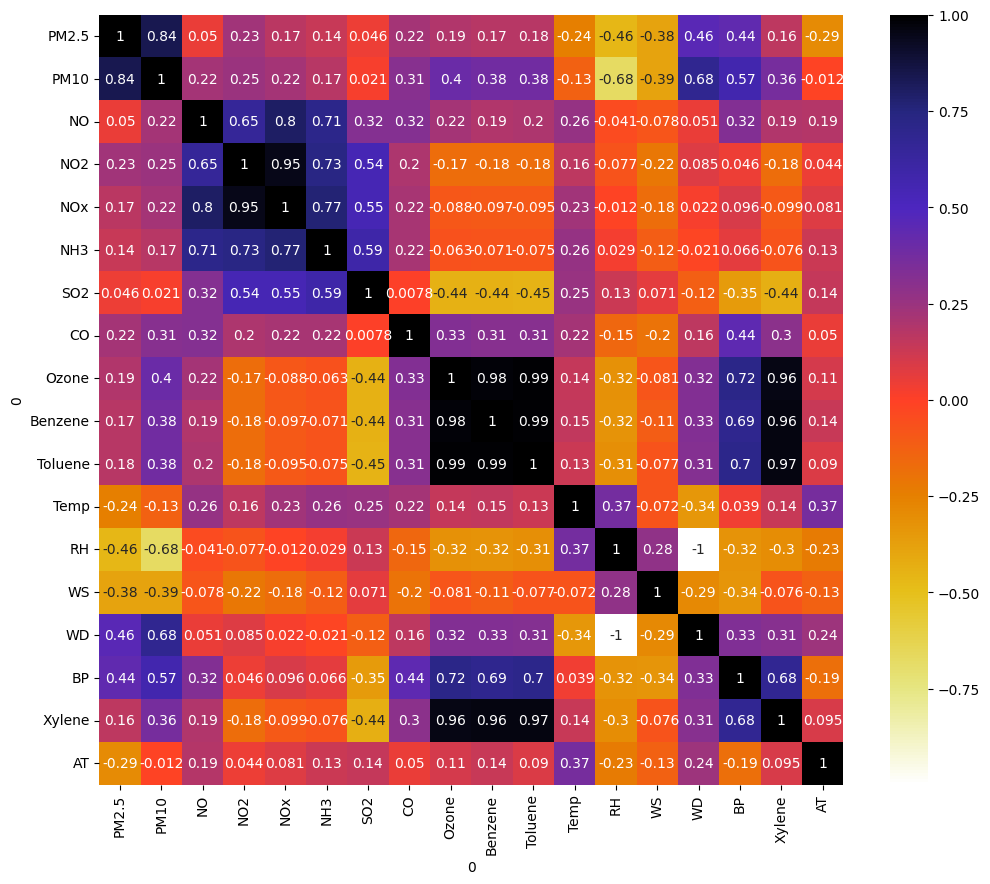

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ... (your existing code)

# Feature Correlation Heatmap
plt.figure(figsize=(12, 10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()


# 3. Split and normalize the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)



🔄 Training with MinMaxScaler...
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
✅ MinMaxScaler - R2: 0.3471, MAE: 14.8078, RMSE: 23.3532

🔄 Training with StandardScaler...
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
✅ StandardScaler - R2: -0.0055, MAE: 21.0193, RMSE: 28.9813

🔄 Training with RobustScaler...
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
✅ RobustScaler - R2: 0.0280, MAE: 19.6761, RMSE: 28.4942

🔄 Training with MaxAbsScaler...
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
✅ MaxAbsScaler - R2: 0.1001, MAE: 18.6486, RMSE: 27.4176

🔄 Training with PowerTransformer...
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
✅ PowerTransformer - R2: 0.0009, MAE: 21.7114, RMSE: 28.8892

🔄 Training with QuantileTransformer...


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (353). n_quantiles is set to n_samples.
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
✅ QuantileTransformer - R2: -0.0382, MAE: 21.9931, RMSE: 29.4483


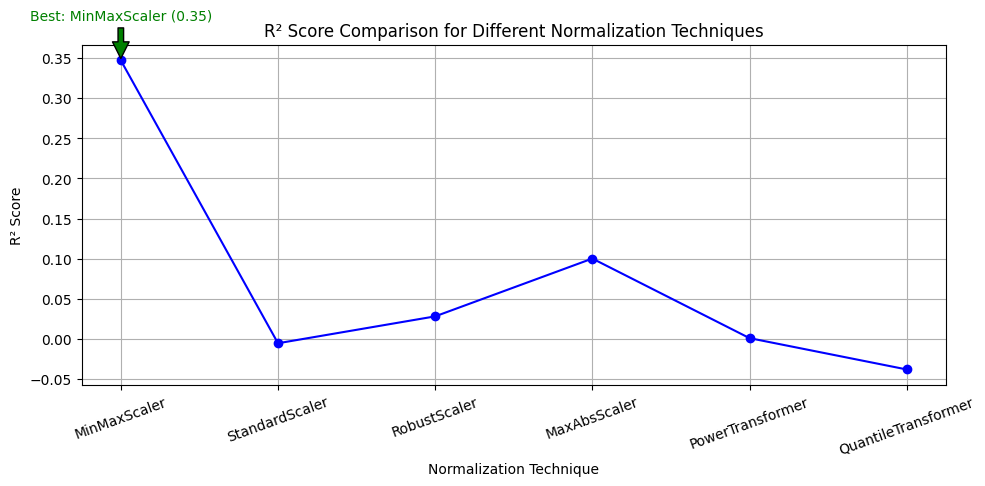

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler, PowerTransformer, QuantileTransformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping

# ⛏️ Define model builder
def build_model(input_dim):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model


# 🛑 Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 🔁 All scalers you want to compare
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler(),
    "MaxAbsScaler": MaxAbsScaler(),
    "PowerTransformer": PowerTransformer(method='yeo-johnson'),
    "QuantileTransformer": QuantileTransformer(output_distribution='normal', random_state=0)
}

# 📊 Dictionary to store results
results = {}

# 🧪 Loop through scalers
for name, scaler in scalers.items():
    print(f"\n🔄 Training with {name}...")

    # Scale the data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Build and train model
    model = build_model(X_train_scaled.shape[1])
    model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, callbacks=[early_stop], verbose=0)

    # Predictions
    y_pred = model.predict(X_test_scaled).flatten()

    # Metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store results
    results[name] = {"R2": r2, "MAE": mae, "RMSE": rmse}

    # Print
    print(f"✅ {name} - R2: {r2:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}")

# 🎯 Plot R² comparison
scaler_names = list(results.keys())
r2_values = [results[scaler]["R2"] for scaler in scaler_names]

plt.figure(figsize=(10, 5))
plt.plot(scaler_names, r2_values, marker='o', linestyle='-', color='blue')
plt.title("R² Score Comparison for Different Normalization Techniques")
plt.xlabel("Normalization Technique")
plt.ylabel("R² Score")
plt.grid(True)
plt.xticks(rotation=20)

# Highlight best
best_scaler = max(results, key=lambda x: results[x]["R2"])
best_score = results[best_scaler]["R2"]
plt.annotate(f'Best: {best_scaler} ({best_score:.2f})',
             xy=(best_scaler, best_score),
             xytext=(best_scaler, best_score + 0.05),
             arrowprops=dict(facecolor='green', shrink=0.05),
             ha='center', fontsize=10, color='green')

plt.tight_layout()
plt.show()


In [ ]:
# Split Dataset to train and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Normalize the data is a technique used in databases to organize data efficiently.


scaler = MinMaxScaler()

# ✅ Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




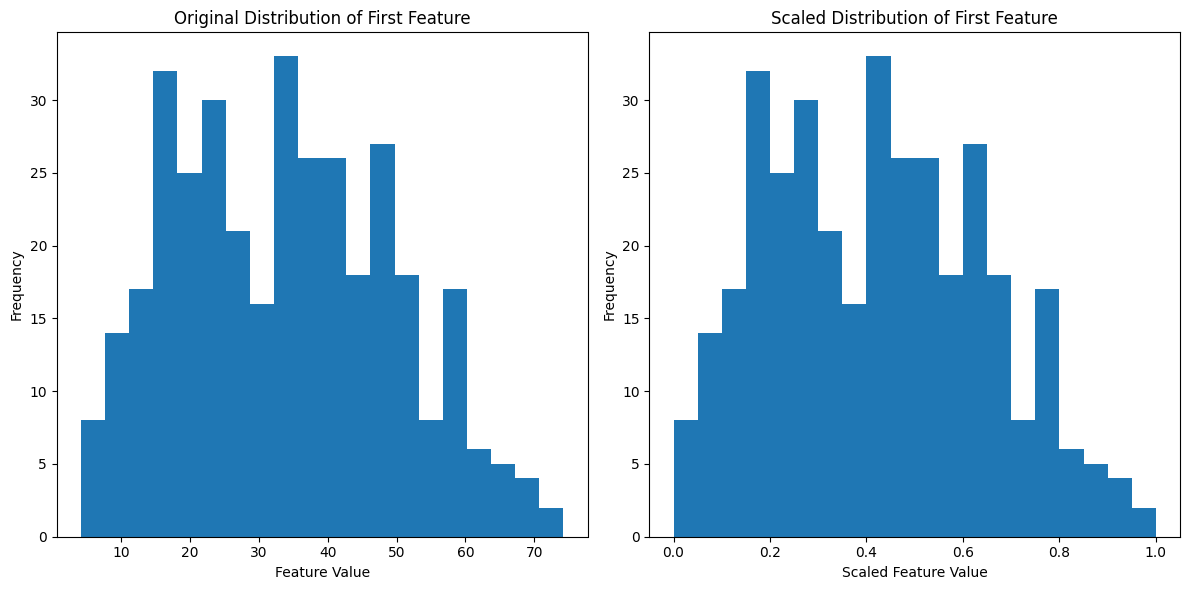

In [ ]:

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(X_train.iloc[:, 0], bins=20)
plt.title('Original Distribution of First Feature')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
plt.hist(X_train_scaled[:, 0], bins=20)
plt.title('Scaled Distribution of First Feature')
plt.xlabel('Scaled Feature Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# 4. Build and compile the ANN model

In [ ]:
def build_model(input_dim):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

model = build_model(X_train_scaled.shape[1])
model.summary()
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Model: "sequential_82"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_222 (Dense)               │ (None, 128)            │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_111 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_223 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_112 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_224 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,753 (42.00 KB)

 Trainable params: 10,753 (42.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 8229.0449 - mae: 87.6274 - val_loss: 9029.0576 - val_mae: 92.5923
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8394.4668 - mae: 88.4453 - val_loss: 8801.8594 - val_mae: 91.3651
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7733.3286 - mae: 84.8531 - val_loss: 8448.4238 - val_mae: 89.4236
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7886.5444 - mae: 85.2401 - val_loss: 7905.2666 - val_mae: 86.3481
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6833.9229 - mae: 79.5231 - val_loss: 7118.0825 - val_mae: 81.6771
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6076.7280 - mae: 74.0037 - val_loss: 6066.1313 - val_mae: 74.9621
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5071.8535 - mae: 66.7565 - val_loss: 4779.7505 - val_mae: 65.7733
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3833.7761 - mae: 57.6687 - val_loss: 3381.9814 - val_mae: 53.9518
Epoch 9/

# 5. Train and evaluate the model

In [ ]:
y_pred = model.predict(X_test_scaled)
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
R2 Score: 0.40730175372483834
MAE: 13.960636130933375
MSE: 495.10046229283034


# 6. Predict and compare results

In [ ]:
predictions = model.predict(X_test_scaled)

# Showing the first 5 actual vs predicted values
comparison_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions.flatten()})
print(comparison_df.head())

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
   Actual   Predicted
0  103.19  111.087158
1  105.29   76.047447
2   41.47   68.253761
3   91.56   82.243393
4   88.55   84.291351


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


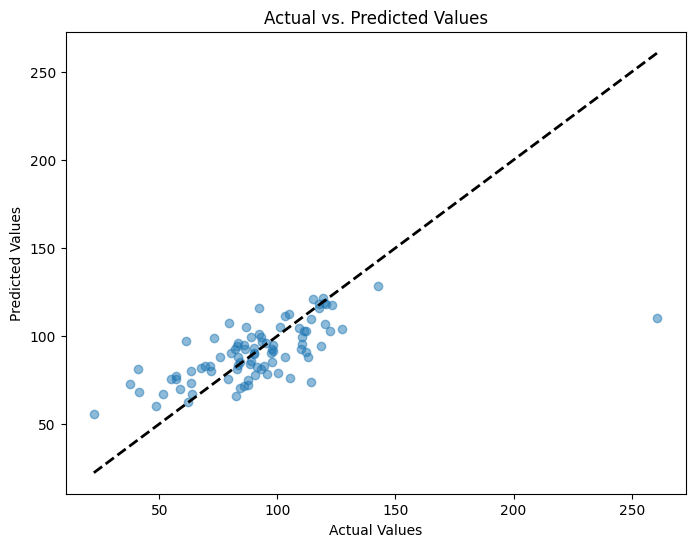

In [ ]:

y_pred = model.predict(X_test_scaled)

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line representing perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.show()


In [ ]:

actual = y_test.values
predicted = predictions.flatten()

mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
r2 = r2_score(actual, predicted)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 13.96
Mean Squared Error (MSE): 495.10
Root Mean Squared Error (RMSE): 22.25
R-squared (R²): 0.41


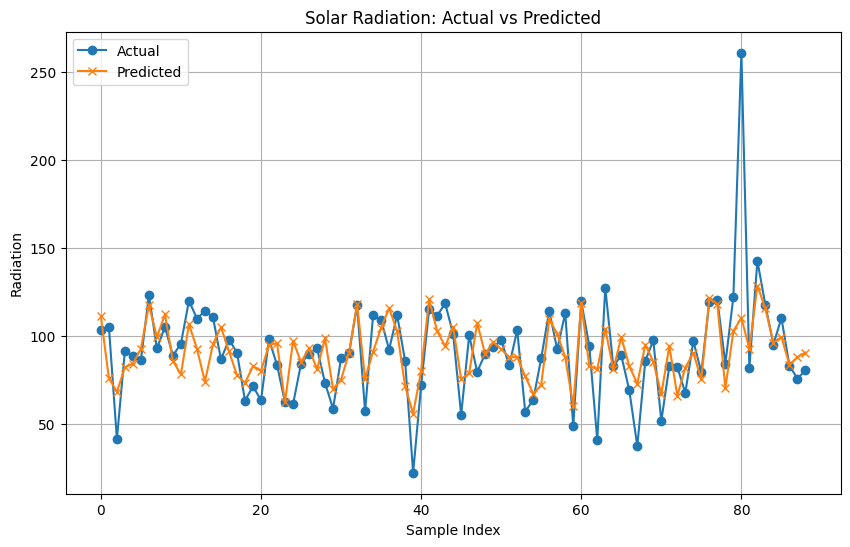

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(comparison_df['Actual'].values[:100], label='Actual', marker='o')
plt.plot(comparison_df['Predicted'].values[:100], label='Predicted', marker='x')
plt.title("Solar Radiation: Actual vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Radiation")
plt.legend()
plt.grid(True)
plt.show()
